In [1]:
from sklearn.datasets import load_boston
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats as stats
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

import math
import warnings

from IPython.display import display
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)



In [2]:
boston = load_boston()

In [3]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

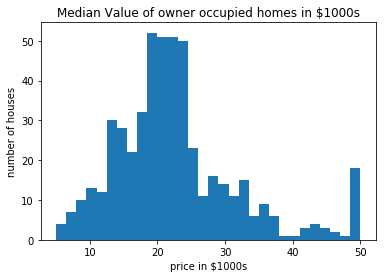

In [4]:
plt.hist(boston.target, bins=30);
plt.xlabel('price in $1000s')
plt.ylabel('number of houses')
plt.title('Median Value of owner occupied homes in $1000s');

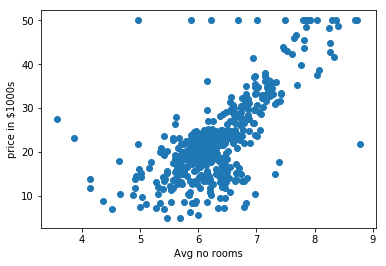

In [5]:
plt.scatter(boston.data[:, 5], boston.target)
plt.xlabel('Avg no rooms')
plt.ylabel('price in $1000s');

In [6]:
Boston = pd.DataFrame(boston.data)
Boston.columns = boston.feature_names
Boston['Price'] = boston.target
Boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.006,18.000,2.310,0.000,0.538,6.575,65.200,4.090,1.000,296.000,15.300,396.900,4.980,24.000
1,0.027,0.000,7.070,0.000,0.469,6.421,78.900,4.967,2.000,242.000,17.800,396.900,9.140,21.600
2,0.027,0.000,7.070,0.000,0.469,7.185,61.100,4.967,2.000,242.000,17.800,392.830,4.030,34.700
3,0.032,0.000,2.180,0.000,0.458,6.998,45.800,6.062,3.000,222.000,18.700,394.630,2.940,33.400
4,0.069,0.000,2.180,0.000,0.458,7.147,54.200,6.062,3.000,222.000,18.700,396.900,5.330,36.200


In [7]:
Boston.columns = ['Crime', 'Zone', 'Business', 'River', 'Nitric', 'Rooms', 'Age', 'Distance_job', 'Highway', 'Tax',
            'Teachers', 'Black', 'LSTAT', 'Price']

In [8]:
Boston.head()

,Crime,Zone,Business,River,Nitric,Rooms,Age,Distance_job,Highway,Tax,Teachers,Black,LSTAT,Price
0,0.006,18.000,2.310,0.000,0.538,6.575,65.200,4.090,1.000,296.000,15.300,396.900,4.980,24.000
1,0.027,0.000,7.070,0.000,0.469,6.421,78.900,4.967,2.000,242.000,17.800,396.900,9.140,21.600
2,0.027,0.000,7.070,0.000,0.469,7.185,61.100,4.967,2.000,242.000,17.800,392.830,4.030,34.700
3,0.032,0.000,2.180,0.000,0.458,6.998,45.800,6.062,3.000,222.000,18.700,394.630,2.940,33.400
4,0.069,0.000,2.180,0.000,0.458,7.147,54.200,6.062,3.000,222.000,18.700,396.900,5.330,36.200


In [9]:
Boston.isnull().sum()

Crime           0
Zone            0
Business        0
River           0
Nitric          0
Rooms           0
Age             0
Distance_job    0
Highway         0
Tax             0
Teachers        0
Black           0
LSTAT           0
Price           0
dtype: int64

In [10]:
Boston._get_numeric_data().corr()

,Crime,Zone,Business,River,Nitric,Rooms,Age,Distance_job,Highway,Tax,Teachers,Black,LSTAT,Price
Crime,1.000,-0.199,0.404,-0.055,0.418,-0.220,0.351,-0.378,0.622,0.580,0.288,-0.377,0.452,-0.386
Zone,-0.199,1.000,-0.534,-0.043,-0.517,0.312,-0.570,0.664,-0.312,-0.315,-0.392,0.176,-0.413,0.360
Business,0.404,-0.534,1.000,0.063,0.764,-0.392,0.645,-0.708,0.595,0.721,0.383,-0.357,0.604,-0.484
River,-0.055,-0.043,0.063,1.000,0.091,0.091,0.087,-0.099,-0.007,-0.036,-0.122,0.049,-0.054,0.175
Nitric,0.418,-0.517,0.764,0.091,1.000,-0.302,0.731,-0.769,0.611,0.668,0.189,-0.380,0.591,-0.427
Rooms,-0.220,0.312,-0.392,0.091,-0.302,1.000,-0.240,0.205,-0.210,-0.292,-0.356,0.128,-0.614,0.695
Age,0.351,-0.570,0.645,0.087,0.731,-0.240,1.000,-0.748,0.456,0.506,0.262,-0.274,0.602,-0.377
Distance_job,-0.378,0.664,-0.708,-0.099,-0.769,0.205,-0.748,1.000,-0.495,-0.534,-0.232,0.292,-0.497,0.250
Highway,0.622,-0.312,0.595,-0.007,0.611,-0.210,0.456,-0.495,1.000,0.910,0.465,-0.444,0.489,-0.382
Tax,0.580,-0.315,0.721,-0.036,0.668,-0.292,0.506,-0.534,0.910,1.000,0.461,-0.442,0.544,-0.469


              Crime   Zone  Business  River  Nitric  Rooms    Age  \
Crime         1.000 -0.199     0.404 -0.055   0.418 -0.220  0.351   
Zone         -0.199  1.000    -0.534 -0.043  -0.517  0.312 -0.570   
Business      0.404 -0.534     1.000  0.063   0.764 -0.392  0.645   
River        -0.055 -0.043     0.063  1.000   0.091  0.091  0.087   
Nitric        0.418 -0.517     0.764  0.091   1.000 -0.302  0.731   
Rooms        -0.220  0.312    -0.392  0.091  -0.302  1.000 -0.240   
Age           0.351 -0.570     0.645  0.087   0.731 -0.240  1.000   
Distance_job -0.378  0.664    -0.708 -0.099  -0.769  0.205 -0.748   
Highway       0.622 -0.312     0.595 -0.007   0.611 -0.210  0.456   
Tax           0.580 -0.315     0.721 -0.036   0.668 -0.292  0.506   
Teachers      0.288 -0.392     0.383 -0.122   0.189 -0.356  0.262   
Black        -0.377  0.176    -0.357  0.049  -0.380  0.128 -0.274   
LSTAT         0.452 -0.413     0.604 -0.054   0.591 -0.614  0.602   
Price        -0.386  0.360    -0.4

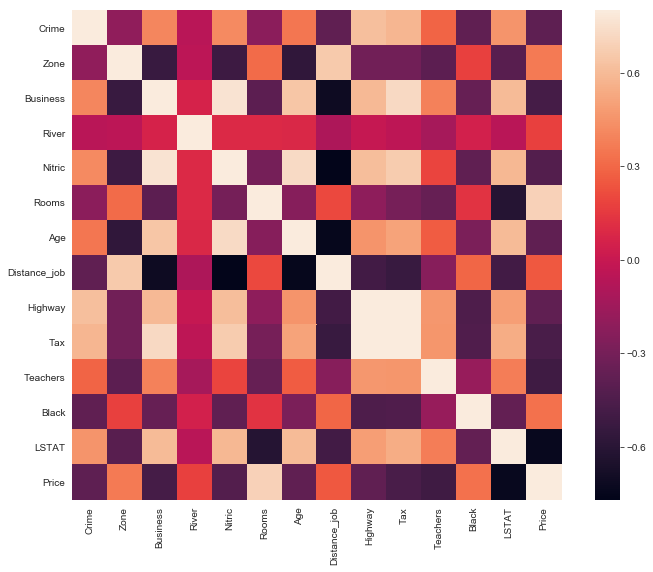

In [11]:
sns.set_style("white")

corrmat = Boston.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

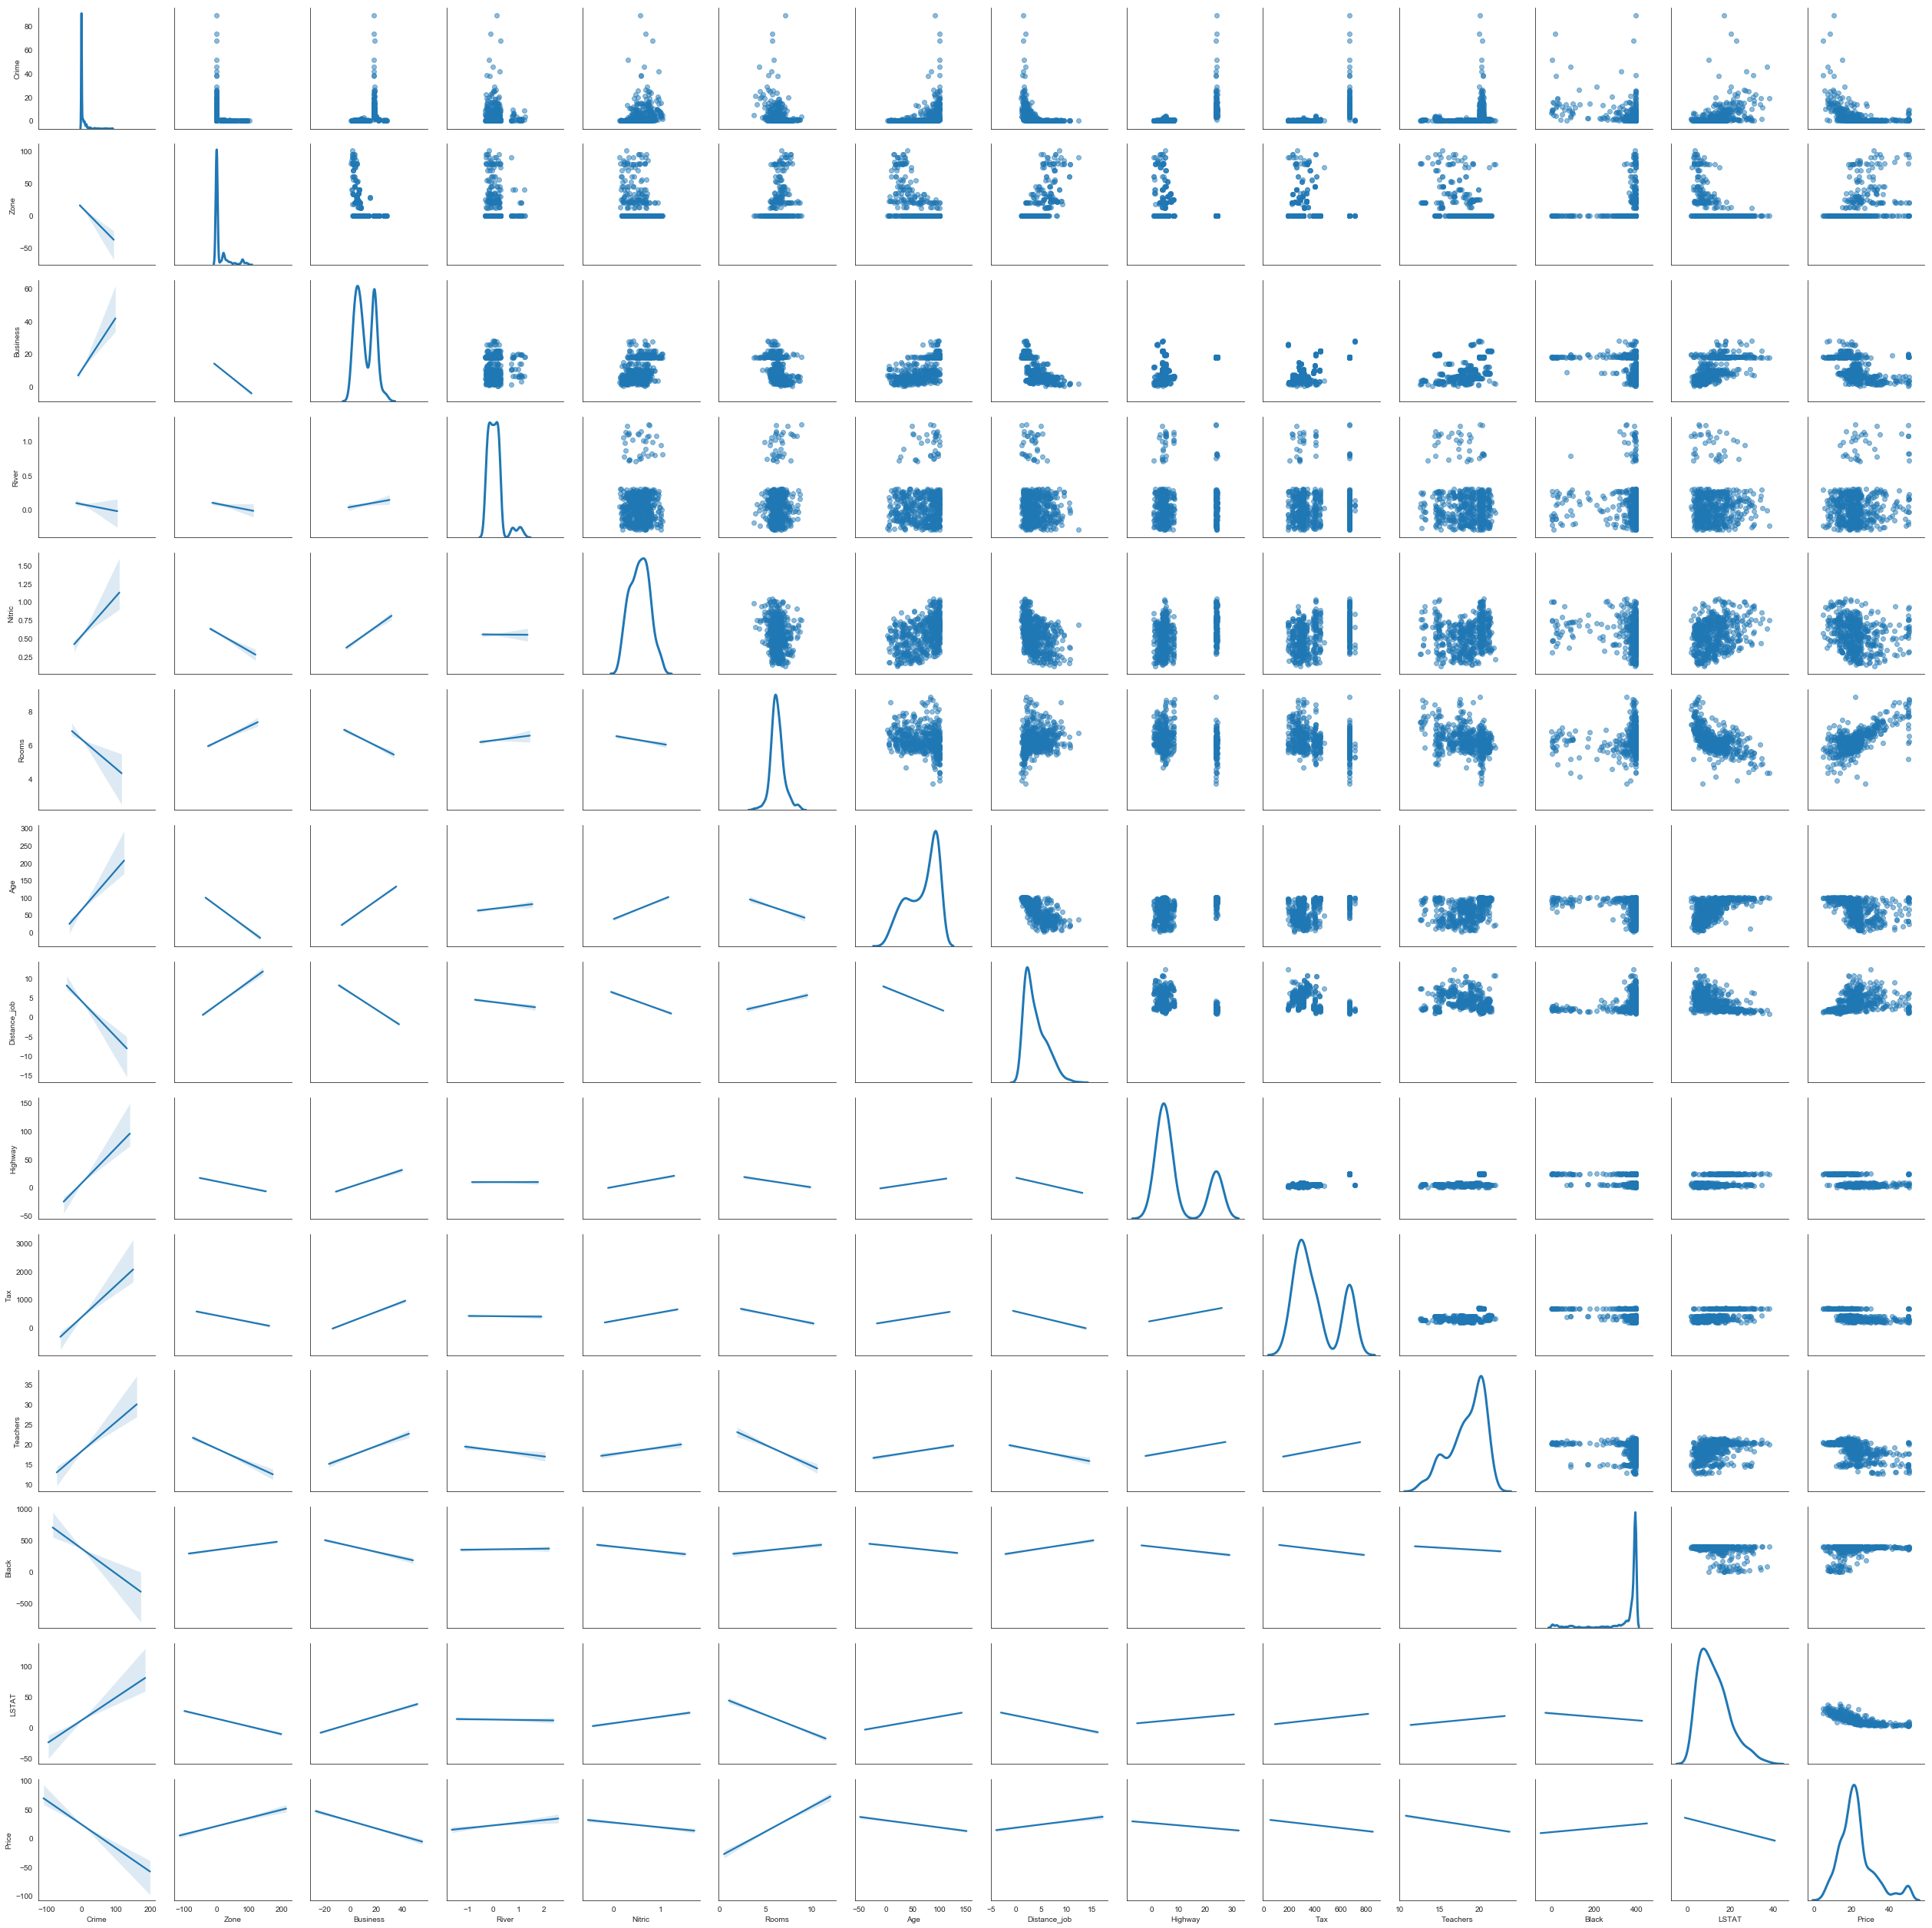

In [12]:
# Make a copy of the data to add jitter to and plot.
Boston_jittered = Boston.dropna()
# Making the random noise.
jitter = pd.DataFrame(
    np.random.uniform(-.3, .3, size=(Boston_jittered.shape)),
    columns=Boston_jittered.columns
)
# Combine the data and the noise.
Boston_jittered = Boston_jittered.add(jitter)

# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(Boston_jittered.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

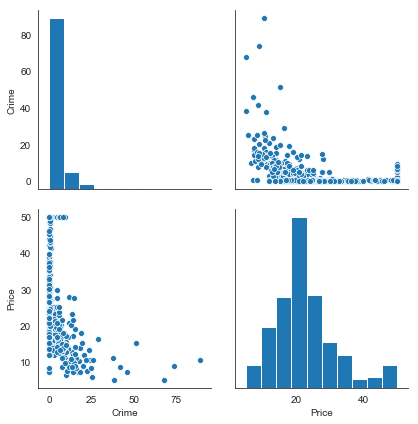

In [13]:
sns.pairplot(Boston, height=3,
            vars=["Crime", "Price"])

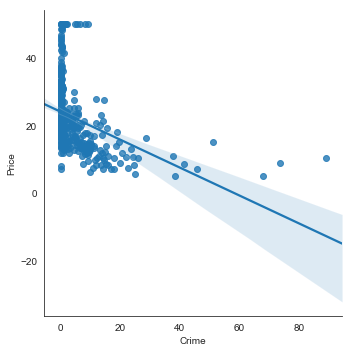

In [14]:
sns.lmplot(x='Crime', y='Price', data=Boston)

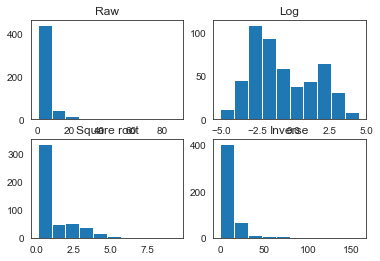

In [15]:
fig = plt.figure()

fig.add_subplot(221)
plt.hist(Boston['Crime'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(Boston['Crime'].dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(Boston['Crime'].dropna()))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/Boston['Crime'].dropna())
plt.title('Inverse')
plt.show()

In [16]:
Boston['Log_Crime'] = (np.log(Boston['Crime']))
Boston['Sqrt_Crime'] = (np.sqrt(Boston['Crime']))
Boston['Inverse_Crime'] = (1/Boston['Crime'])

In [17]:
print(scipy.stats.shapiro(Boston['Crime']))
print(scipy.stats.shapiro(np.sqrt(Boston['Crime'])))
print(scipy.stats.shapiro(np.log(Boston['Crime'])))
print(scipy.stats.shapiro(1/Boston['Crime']))

(0.44783419370651245, 1.1809726430906575e-36)
(0.7330471277236938, 1.0745765606272442e-27)
(0.9440233707427979, 6.901645596170403e-13)
(0.613524317741394, 4.314495380070959e-32)


In [18]:
# Making dummies.
# Also creating a data frame to hold our features.
features = pd.get_dummies(Boston)
features['log_Crime'] = Boston['Log_Crime']

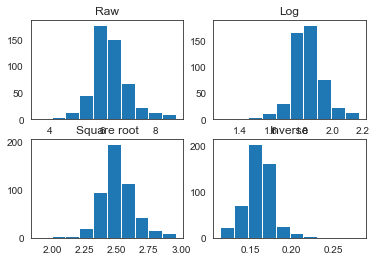

In [19]:
fig = plt.figure()

fig.add_subplot(221)
plt.hist(Boston['Rooms'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(Boston['Rooms'].dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(Boston['Rooms'].dropna()))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/Boston['Rooms'].dropna())
plt.title('Inverse')
plt.show()

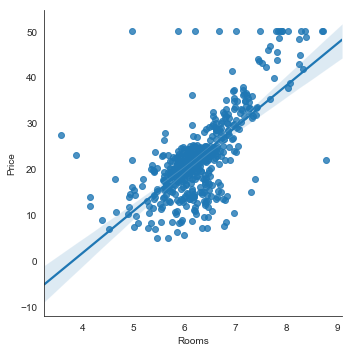

In [20]:
sns.lmplot(x='Rooms', y='Price', data=Boston)

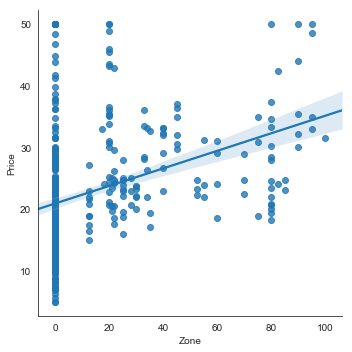

In [21]:
sns.lmplot(x='Zone', y='Price', data=Boston)

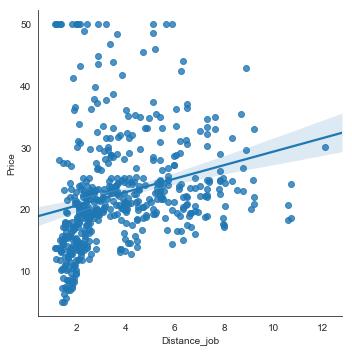

In [22]:
sns.lmplot(x='Distance_job', y='Price', data=Boston)

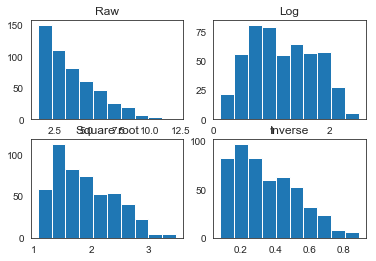

In [23]:
fig1 = plt.figure()

fig1.add_subplot(221)
plt.hist(Boston['Distance_job'].dropna())
plt.title('Raw')

fig1.add_subplot(222)
plt.hist(np.log(Boston['Distance_job'].dropna()))
plt.title('Log')

fig1.add_subplot(223)
plt.hist(np.sqrt(Boston['Distance_job'].dropna()))
plt.title('Square root')

ax3=fig1.add_subplot(224)
plt.hist(1/Boston['Distance_job'].dropna())
plt.title('Inverse')
plt.show()

In [24]:
Boston['Log_Distance_job'] = (np.log(Boston['Distance_job']))
Boston['Sqrt_Distance_job'] = (np.sqrt(Boston['Distance_job']))
Boston['Inverse_Distance_job'] = (1/Boston['Distance_job'])

In [25]:
print(scipy.stats.shapiro(Boston['Distance_job']))
print(scipy.stats.shapiro(np.sqrt(Boston['Distance_job'])))
print(scipy.stats.shapiro(np.log(Boston['Distance_job'])))
print(scipy.stats.shapiro(1/Boston['Distance_job']))

(0.9032330513000488, 2.1851281171594835e-17)
(0.9503713250160217, 5.358972380437033e-12)
(0.9730395078659058, 4.940135411857227e-08)
(0.941608726978302, 3.2973472043063e-13)


In [26]:
features['log_Distance_job'] = Boston['Log_Distance_job']

In [27]:
X = Boston[['Rooms', 'Log_Distance_job']]
y = Boston['Price']

In [28]:
import statsmodels.api as sm

In [29]:
est = sm.OLS(y, X) 
estres = est.fit() 
print(estres.summary()) 
ypred = estres.predict(X) 
print(ypred)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     2359.
Date:                Mon, 01 Apr 2019   Prob (F-statistic):          1.29e-256
Time:                        21:09:21   Log-Likelihood:                -1741.5
No. Observations:                 506   AIC:                             3487.
Df Residuals:                     504   BIC:                             3496.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Rooms                3.2454      0.133  

In [30]:
actual = Boston['Price']
residual = actual - ypred

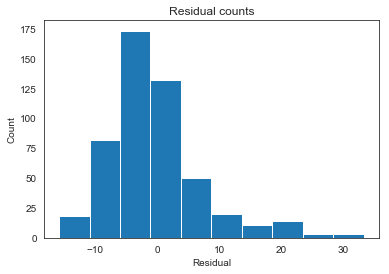

In [31]:
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

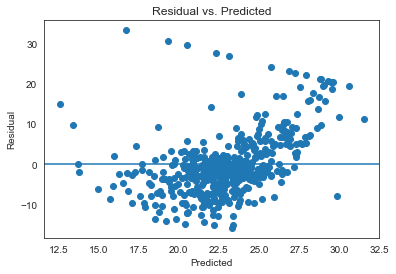

In [32]:
plt.scatter(ypred, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [33]:
regr = linear_model.LinearRegression()

In [34]:
from sklearn.model_selection import cross_val_score

In [35]:
scores = cross_val_score(regr, X, y, cv=6)
print("Cross_validated_scores:", scores)

Cross_validated_scores: [ 0.60218306  0.66205925  0.48806354  0.65077403 -0.44317619 -1.6382746 ]


## KNN Regression

In [36]:
from sklearn import neighbors

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error


In [46]:
X=Boston[['Rooms','Log_Distance_job']]
y=Boston['Price']
#create train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=0)



In [47]:
clf=KNeighborsRegressor(11)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(mean_squared_error(y_test,y_pred))

38.29429099608526


In [49]:
clf=KNeighborsRegressor(5)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(mean_squared_error(y_test,y_pred))

40.71540263157895


In [50]:
clf=KNeighborsRegressor(15)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(mean_squared_error(y_test,y_pred))

37.503829239766084


High MSE means that the model is underfit by quite a bit.  I experimented with different K values and they resulted in high MSE.  